In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = '/Users/nabeel/Desktop/Projects/spotify_tracks_data.csv'
spotify_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
spotify_data.head()


,Unnamed: 0,artist,album,track_name,release_date,duration_ms,popularity
0,0,Taylor Swift,Lover,Cruel Summer,2019-08-23,178426,99
1,1,Doja Cat,Paint The Town Red,Paint The Town Red,2023-08-04,231750,98
2,2,SZA,SOS,Snooze,2022-12-09,201800,92
3,3,Drake,For All The Dogs,IDGAF (feat. Yeat),2023-10-06,260111,94
4,4,Bad Bunny,nadie sabe lo que va a pasar mañana,MONACO,2023-10-13,267194,98


In [2]:
# Data Cleaning Steps

# 1. Drop the unnamed column
spotify_data_cleaned = spotify_data.drop(columns=['Unnamed: 0'], axis=1)

# 2. Check for and remove duplicates
duplicates = spotify_data_cleaned.duplicated().sum()
spotify_data_cleaned = spotify_data_cleaned.drop_duplicates()

# 3. Check for missing values
missing_values = spotify_data_cleaned.isnull().sum()

# 4. Correct data types: Convert release_date to datetime
spotify_data_cleaned['release_date'] = pd.to_datetime(spotify_data_cleaned['release_date'])

# Checking the data types after conversion
data_types = spotify_data_cleaned.dtypes

(duplicates, missing_values, data_types)


(0,
 artist          0
 album           0
 track_name      0
 release_date    0
 duration_ms     0
 popularity      0
 dtype: int64,
 artist                  object
 album                   object
 track_name              object
 release_date    datetime64[ns]
 duration_ms              int64
 popularity               int64
 dtype: object)

In [3]:
# Feature Engineering

# Extract year and month from 'release_date'
spotify_data_cleaned['year'] = spotify_data_cleaned['release_date'].dt.year
spotify_data_cleaned['month'] = spotify_data_cleaned['release_date'].dt.month

# Check the DataFrame with new features
spotify_data_cleaned.head()


,artist,album,track_name,release_date,duration_ms,popularity,year,month
0,Taylor Swift,Lover,Cruel Summer,2019-08-23,178426,99,2019,8
1,Doja Cat,Paint The Town Red,Paint The Town Red,2023-08-04,231750,98,2023,8
2,SZA,SOS,Snooze,2022-12-09,201800,92,2022,12
3,Drake,For All The Dogs,IDGAF (feat. Yeat),2023-10-06,260111,94,2023,10
4,Bad Bunny,nadie sabe lo que va a pasar mañana,MONACO,2023-10-13,267194,98,2023,10


In [4]:
# Exploratory Data Analysis (EDA)

# 1. Calculate the mean popularity of tracks by artist
popularity_by_artist = spotify_data_cleaned.groupby('artist')['popularity'].mean().sort_values(ascending=False)

# 2. Calculate the mean popularity of tracks by year
popularity_by_year = spotify_data_cleaned.groupby('year')['popularity'].mean()

# 3. Calculate the mean popularity of tracks by month
popularity_by_month = spotify_data_cleaned.groupby('month')['popularity'].mean()

# 4. Find the top 10 artists with the most popular tracks
top_artists = popularity_by_artist.head(10)

(popularity_by_artist, popularity_by_year, popularity_by_month, top_artists)


(artist
 Tate McRae              100.000000
 Kenya Grace              98.000000
 Mitski                   97.000000
 Myke Towers              97.000000
 Tyla                     95.000000
 Gunna                    95.000000
 Jung Kook                95.000000
 David Kushner            95.000000
 Billie Eilish            95.000000
 Peso Pluma               95.000000
 Doja Cat                 95.000000
 Dua Lipa                 94.000000
 Metro Boomin             92.000000
 Travis Scott             91.000000
 KAROL G                  90.000000
 Nicki Minaj              90.000000
 SZA                      89.500000
 Zach Bryan               89.500000
 Luke Combs               89.000000
 Bad Bunny                88.619048
 Selena Gomez             88.000000
 Noah Kahan               87.500000
 Oliver Anthony Music     87.000000
 Paul Russell             86.000000
 Taylor Swift             85.500000
 Lil Tecca                85.000000
 Drake                    84.368421
 Lil Durk           

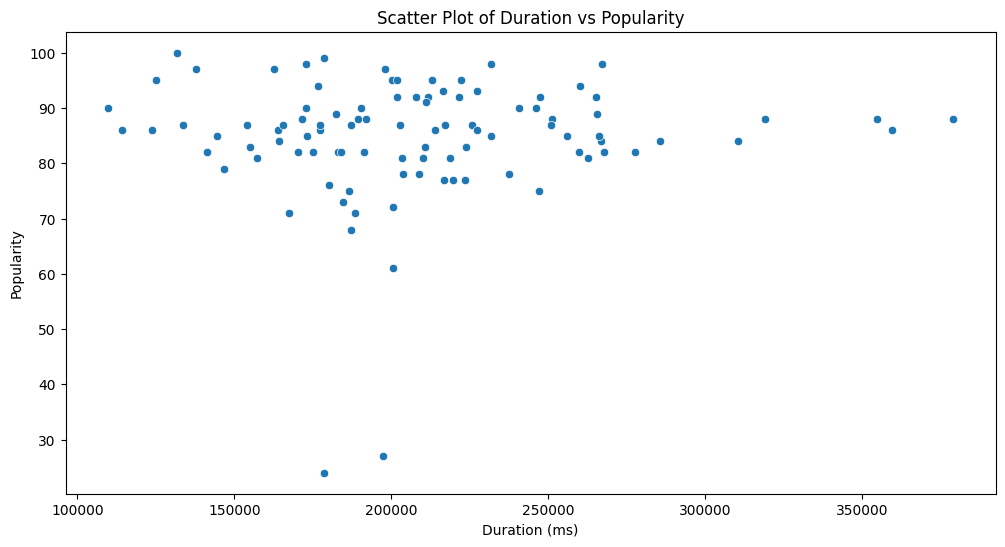

0.04926186856894443

In [16]:
# Calculate the correlation coefficient between duration and popularity
duration_popularity_corr = spotify_data_cleaned['duration_ms'].corr(spotify_data_cleaned['popularity'])

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship between duration and popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration_ms', y='popularity', data=spotify_data_cleaned)
plt.title('Scatter Plot of Duration vs Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

duration_popularity_corr


In [17]:
# Function to convert milliseconds to minutes, seconds, and milliseconds format (m.ss.ms)
def convert_ms_to_mssms(duration_ms):
    # Convert milliseconds to seconds
    seconds = duration_ms // 1000
    # Get minutes from seconds
    minutes = seconds // 60
    # Remaining seconds after converting to minutes
    seconds = seconds % 60
    # Remaining milliseconds
    milliseconds = duration_ms % 1000
    # Format: minutes.seconds.milliseconds
    return f"{minutes}.{seconds:02d}.{milliseconds:03d}"

# Apply the conversion to the duration_ms column
spotify_data_cleaned['duration_mssms'] = spotify_data_cleaned['duration_ms'].apply(convert_ms_to_mssms)

# Show the updated dataframe with the new duration format
spotify_data_cleaned[['duration_ms', 'duration_mssms']].head()


,duration_ms,duration_mssms
0,178426,2.58.426
1,231750,3.51.750
2,201800,3.21.800
3,260111,4.20.111
4,267194,4.27.194


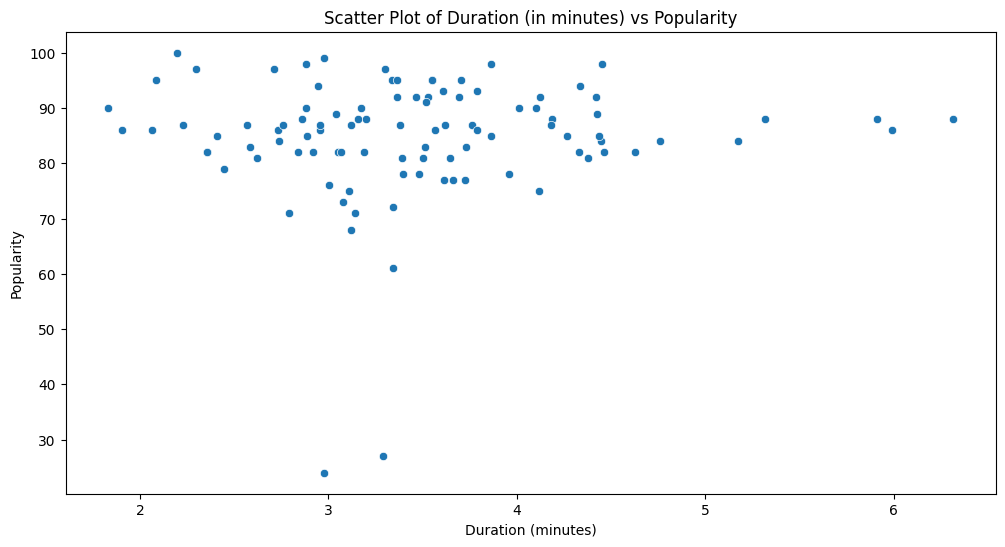

In [18]:
# For the visualization, we'll need to convert the duration into a float representing minutes and seconds
# Where the seconds are a fraction of a minute
def convert_ms_to_minutes(duration_ms):
    # Convert milliseconds to seconds
    total_seconds = duration_ms / 1000
    # Convert total seconds to fractional minutes
    minutes = total_seconds / 60
    return minutes

# Apply the conversion to create a new column for the visualization
spotify_data_cleaned['duration_minutes'] = spotify_data_cleaned['duration_ms'].apply(convert_ms_to_minutes)

# Now we can recreate the scatter plot with the new duration in minutes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration_minutes', y='popularity', data=spotify_data_cleaned)
plt.title('Scatter Plot of Duration (in minutes) vs Popularity')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.show()
